In [48]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

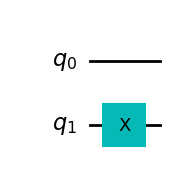

In [49]:
# creating a constant oracle, input has no effect on the ouput
# Create a quantum circuit with 2 qubits. One as input and other as output
constant_oracle = QuantumCircuit(2)

# get a random number from 0 or 1
output = np.random.randint(2)

# what ever get in input, its having no effect.
# the output will be the random value 0 or 1
if output == 1:
    constant_oracle.x(1)

# draw the circuit
constant_oracle.draw('mpl')

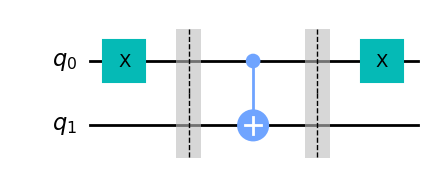

In [50]:
# creating a balanced oracle,
# perform CNOTs with first qubit input as a control and the second qubit output as the target.
balanced_oracle = QuantumCircuit(2)

# Place X-gate for input qubit
balanced_oracle.x(0)

# Use barrier as divider
balanced_oracle.barrier()

# Place Controlled-NOT gates
balanced_oracle.cx(0, 1)

# using barrier as a divider and avoid cancelling gates by the transpiler 
balanced_oracle.barrier()

# Place X-gates
balanced_oracle.x(0)

# Show oracle
balanced_oracle.draw('mpl')

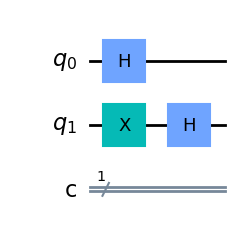

In [51]:
#initialise the input qubits in the state  |+⟩
# and the output qubit in the state |−⟩
dj_circuit = QuantumCircuit(2, 1)

# Apply H-gates
dj_circuit.h(0)

# Put qubit in state |->
dj_circuit.x(1)
dj_circuit.h(1)
dj_circuit.draw('mpl')

In [52]:
# define the oracle function to use
#oracle_fn = constant_oracle
oracle_fn = balanced_oracle

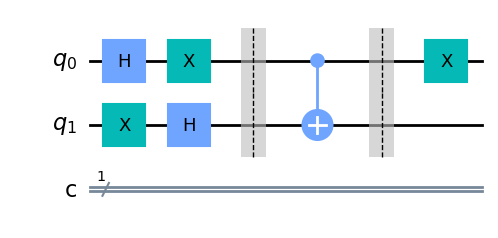

In [53]:
# Add oracle function
dj_circuit &= oracle_fn
dj_circuit.draw('mpl')

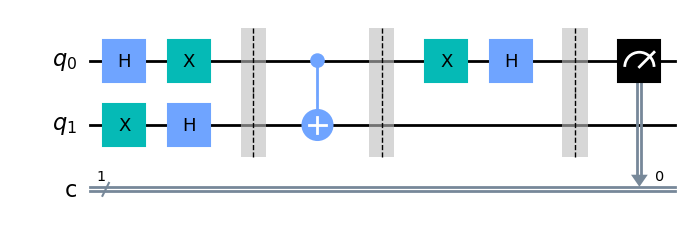

In [54]:
# perform H-gates on qubit and measure input register
dj_circuit.h(0)
dj_circuit.barrier()

# Measure
dj_circuit.measure(0, 0)

# Display circuit
dj_circuit.draw('mpl')

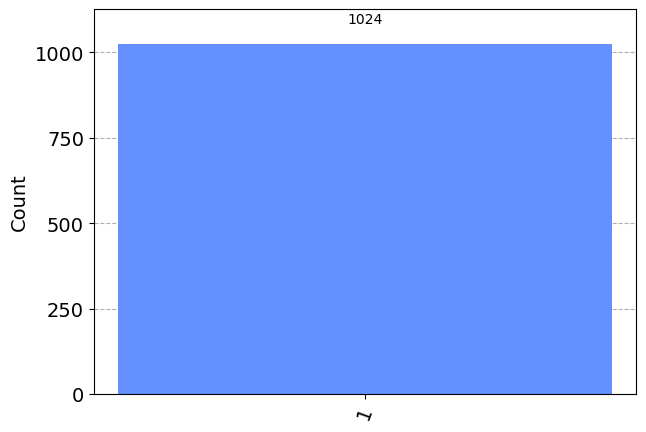

In [55]:
# check the output
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)